In [221]:
import os 
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths, chirp
from scipy.optimize import curve_fit
import plotly.io as pio

In [222]:
directorio = '/Users/carlosabraham1/Desktop/ftir'

archivos = os.listdir(directorio)
archivos = [archivo for archivo in archivos if archivo.endswith('.DAT')] #filtrado de archivos con extensión .DAT


print(archivos)


['NH4OH.DAT', 'UREA.DAT', 'C1 400 ºC.DAT', 'C3 600 ºC.DAT', 'C2 500 ºC.DAT', '3.DAT', '2.DAT', '1.DAT']


El resultado del codigo siguiente debe ser un data un diciconario con un par de datos x, y 

In [223]:
archivos_formateados = {}
dicc_data={}



for i, archivo in enumerate(archivos, start=0):
    
    ruta_completa = os.path.join(directorio, archivo)
   
   
    if os.path.isfile(ruta_completa):
        
        with open(ruta_completa, 'r',  encoding='utf-8', errors='ignore') as file:
             
             
             contenido = []
             data_list_mayor_igual_300 = []
             data_list_menor_300 = []


             for line in file:
                 contenido.extend([float(item) for item in line.strip().split()])

             for dato in contenido:    
                if dato >= 300:
                    data_list_mayor_igual_300.append(dato)   #columna x

                else: 
                   data_list_menor_300.append(dato)     #columna y 
                   
                  
                   

            
             archivos_formateados[f'data{i}']={ 'x':data_list_mayor_igual_300,'y':data_list_menor_300 }

            

    else: 
        print('se encontró una subcarpeta en el directorio')
        break    
    
for i, (key, value) in enumerate(archivos_formateados.items()):
    df = pd.DataFrame(value)
    dicc_data[f'df{i}']=df

In [224]:
#dicc_data['df0']

Text(0.5, 1.0, 'FTIR')

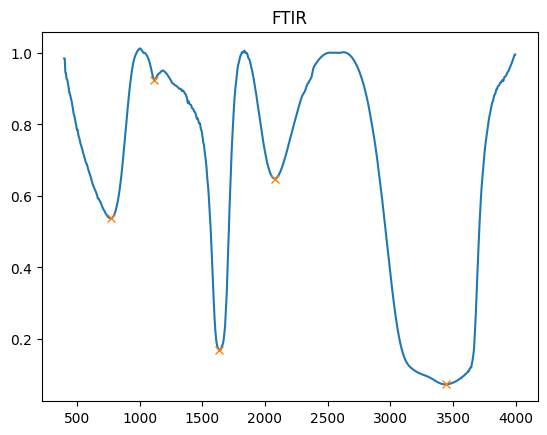

In [231]:
x = dicc_data['df0'].iloc[:, 0]
y = dicc_data['df0'].iloc[:, 1]


peaks,_=find_peaks(-y,  width=20)
datos_x=x[peaks]
datos_y=y[peaks]

fig, ax= plt.subplots()
ax.plot(x,y)
ax.plot(x[peaks], y[peaks], 'x')
ax.set_title('FTIR')

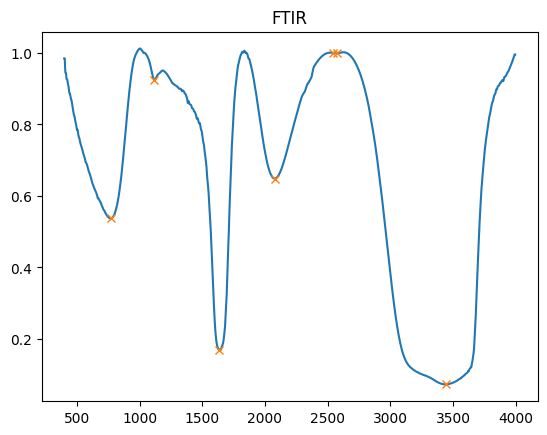

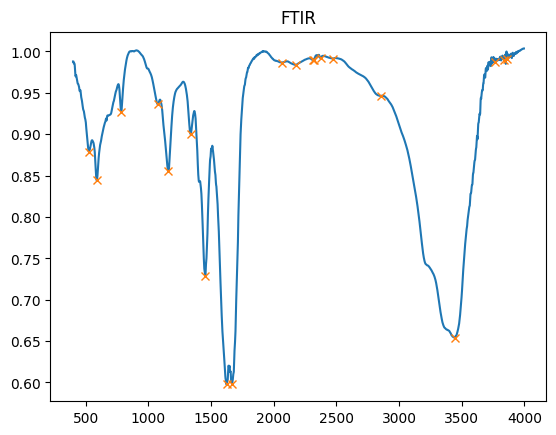

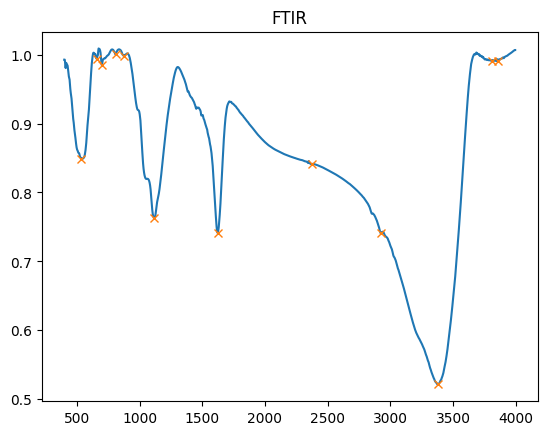

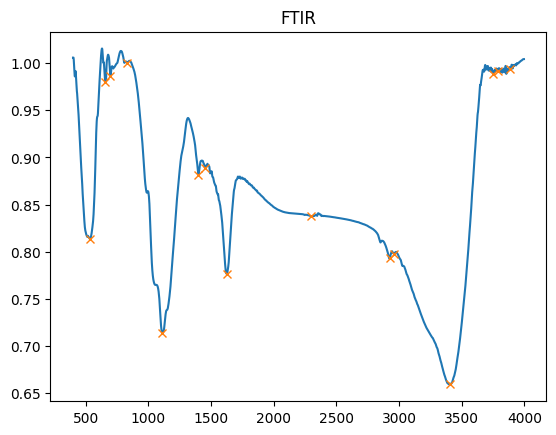

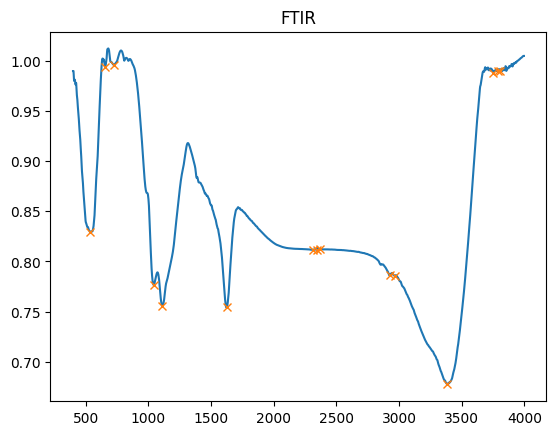

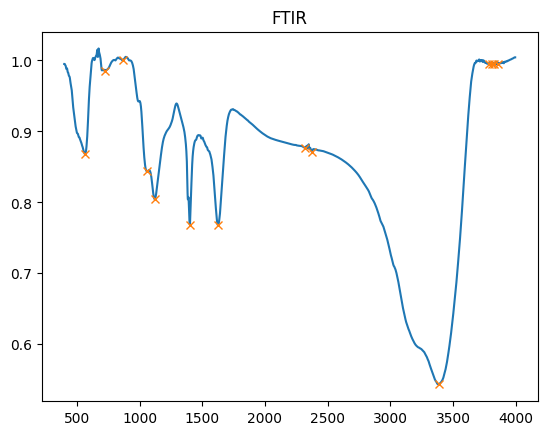

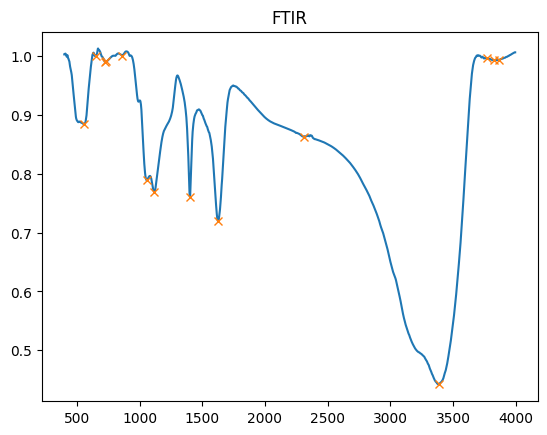

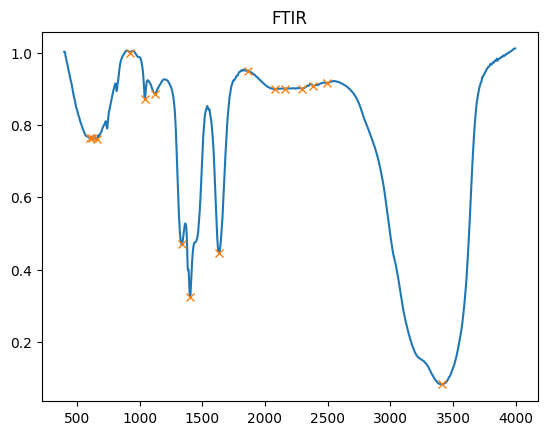

In [234]:
ondas={}

for i in range(8):
    x = dicc_data[f'df{i}'].iloc[:, 0]
    y = dicc_data[f'df{i}'].iloc[:, 1]

    peaks,_=find_peaks(-y,  width=5)
    datos_x=x[peaks]
    datos_y=y[peaks]

    #almacenar los valores de los picos en un df 

    datos = {'picos_y':datos_y, 'picos_x':datos_x}
    ondas[f'df{i}']=pd.DataFrame(datos)



    fig, ax= plt.subplots()
    ax.plot(x,y)
    ax.plot(x[peaks], y[peaks], 'x')
    ax.set_title('FTIR')
               
                
    plt.show(fig)


In [227]:
lista_archivos = {}

for i, archivo in enumerate(archivos, start=0):
    

    # Escribe la ruta donde se encuentra el archivo y ademas escribe el nombre de cada archivo con cada iteracion que se realiza
    ruta_completa = os.path.join(directorio, archivo)
   
    # Verifica si la ruta_completa pertenece a un archivo, si pertenece a un archivo se abre con el metodo open(), de lo contrario no hace nada
    if os.path.isfile(ruta_completa):
        # Abrir el archivo y hacer algo con él
        with open(ruta_completa, 'r',  encoding='utf-8', errors='ignore') as file:
            for line in file:
                 # Dividir los datos en la línea y convertirlos a float
                 data = [float(item) for item in line.strip().split()]
                 # Determinar si el primer valor de la línea es mayor o igual a 300
                 if data[0] >= 300:
                     data_list_mayor_igual_300.append(data)
                 else:
                     data_list_menor_300.append(data)


In [228]:
#tengo que corregir el codido de tal manera que pueda iterar sobre cada una de las listas para poder realizar el filtrado

for line in lista_archivos.split('\n'):
                # Dividir los datos en la línea y convertirlos a float
                data = [float(item) for item in line.strip().split()]

                
                # Determinar si el primer valor de la línea es mayor o igual a 300
                if data and data[0] >= 300:
                    data_list_mayor_igual_300.append(data)
                elif data:
                    data_list_menor_300.append(data)

                 

AttributeError: 'dict' object has no attribute 'split'

In [ ]:
#from itertools import chain


#flat_list = list(chain.from_iterable(data_list_menor_300))




In [ ]:
#data_list_menor_300=list(chain.from_iterable(data_list_menor_300))


In [ ]:
#print(len(data_list_mayor_igual_300[0]))

In [ ]:
# Crear DataFrame utilizando data_list_mayor_igual_300 como columna 'X' y data_list_menor_300 como columna 'Y'
#df = pd.DataFrame({'X': data_list_mayor_igual_300[0], 'Y': data_list_menor_300})
#df['Y'] = df['Y'].apply(lambda x: x[0])

In [ ]:


# Leer el archivo .DAT y almacenar los datos en las listas correspondientes
with open('/Users/carlosabraham1/Desktop/ftir/1.DAT', 'r') as file:
    for line in file:
        # Dividir los datos en la línea y convertirlos a float
        data = [float(item) for item in line.strip().split()]
        # Determinar si el primer valor de la línea es mayor o igual a 300
        if data[0] >= 300:
            data_list_mayor_igual_300.append(data)
        else:
            data_list_menor_300.append(data)


In [ ]:
data_list_mayor_igual_300 = data_list_mayor_igual_300[0]

In [ ]:
long=len(data_list_mayor_igual_300)
long

1866

In [ ]:


# Crear DataFrame utilizando data_list_mayor_igual_300 como columna 'X' y data_list_menor_300 como columna 'Y'
df = pd.DataFrame({'X': data_list_mayor_igual_300, 'Y': data_list_menor_300})
df['Y'] = df['Y'].apply(lambda x: x[0])

print(df)




               X        Y
0     3996.35575  1.01175
1     3994.42701  1.01175
2     3992.49827  1.01175
3     3990.56952  1.01134
4     3988.64078  1.01100
...          ...      ...
1861   406.96480  0.99676
1862   405.03606  1.00044
1863   403.10731  1.00297
1864   401.17857  1.00297
1865   399.24983  1.00297

[1866 rows x 2 columns]


In [ ]:
fig = px.line(
    x=df.iloc[:,0],
    y=df.iloc[:,1]
)
fig.show()

In [ ]:
#data_list